In [1]:
# %matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

import mglearn
import sklearn
from sklearn.decomposition import PCA
from sklearn.datasets import load_breast_cancer

In [2]:
M = np.array([[3,-1,-1],[-1.,3.,1.],[2.,1.,4.]])
print(M)

[[ 3. -1. -1.]
 [-1.  3.  1.]
 [ 2.  1.  4.]]


In [3]:
b = np.array([1.,3.,7.])
print(b)

[1. 3. 7.]


# Método de eliminación Gaussiana

1. Diagonalizar la matriz con unos en la diagonal
2. Hacer la sustiución hacia atrás $ x_{i} = \frac{b_{i} - \sum_{j = i+1}^{n} a_{ij}x_{j}}{a_{ii}} $

In [14]:
def GetGaussianElimination(M_, b_):
    A = M_.copy()
    b = b_.copy()
    
    A = np.float_(A)
    b = np.float_(b)
    n=len(b)
    
    for i in range(n):
        # unos en la diagonal
        a = A[i,i]
        A[i,:] = A[i,:]/a # Dividir toda fila por el valor de la diagonal
        b[i] = b[i]/a
        
        print(A)
        for j in range(i+1, n):
            a = A[j,i] # Tomar el primer elemento de la segunda fila
            A[j,:] = A[j,:] - a*A[i,:] # multiplica el elemento por la fila anterior y suma con la fila actual
            b[j] = b[j] - a*b[i]
    
    x = b.copy()
    for i in range(n-1,-1,-1):
        for j in range(i+1, n):
            x[i] = x[i] - A[i,j]*x[j]
    
    return x, A, b

In [15]:
Xsol, NewM, Newb = GetGaussianElimination(M,b)
print('b',Newb)
print('Xsol',Xsol)

[[ 1.         -0.33333333 -0.33333333]
 [-1.          3.          1.        ]
 [ 2.          1.          4.        ]]
[[ 1.         -0.33333333 -0.33333333]
 [ 0.          1.          0.25      ]
 [ 0.          1.66666667  4.66666667]]
[[ 1.         -0.33333333 -0.33333333]
 [ 0.          1.          0.25      ]
 [ 0.          0.          1.        ]]
('b', array([0.33333333, 1.25      , 1.        ]))
('Xsol', array([1., 1., 1.]))


In [17]:
Inv = np.linalg.inv(M)
print(Inv)

[[ 0.32352941  0.08823529  0.05882353]
 [ 0.17647059  0.41176471 -0.05882353]
 [-0.20588235 -0.14705882  0.23529412]]


In [19]:
Xsol = np.dot( Inv, b )
print(Xsol)

[1. 1. 1.]


# Ajuste por mínimos cuadrados

In [20]:
x = np.array([0,1,2,3])
y = np.array([-0.7, 0.2,1.1,2.3])

Llevar el problema a $y = Ap$, con $A = [[x \ 1]]$ y $p[[m], [b]]$

In [22]:
A = np.vstack( [x, np.ones(len(x))] ).T
print(A)

[[0. 1.]
 [1. 1.]
 [2. 1.]
 [3. 1.]]


In [23]:
# Fitting
m, b = np.linalg.lstsq(A,y,rcond=None)[0]
print(m,b)

(0.9899999999999997, -0.7599999999999989)


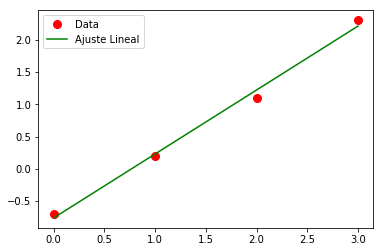

In [24]:
plt.plot(x,y,'ro', markersize=8, label='Data')
plt.plot(x, m*x+b, 'g', label='Ajuste Lineal')
plt.legend()
plt.show()

# Principal Component Analysis PCA

1. Encontrar la dirección en la cual hay una mayor varianza PC1
2. Encontrar un eje ortogonal que intente maximizar la varianza PC2.
3. Los dos ejes los toma como nuevos parámetros para graficar los datos

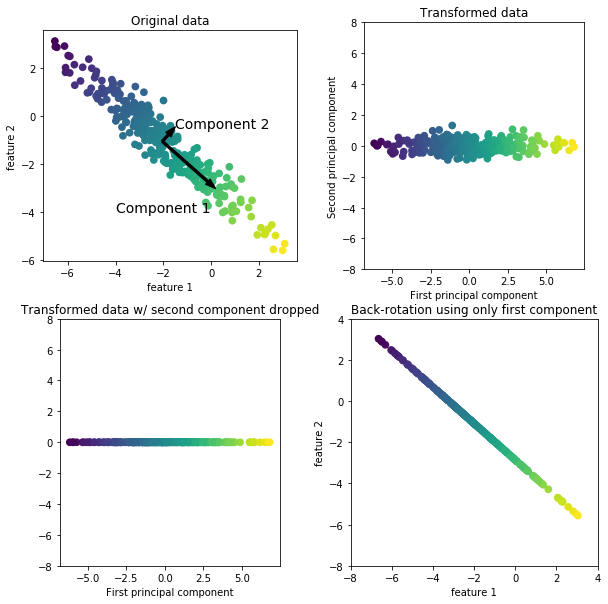

In [25]:
mglearn.plots.plot_pca_illustration()

1. Notar que aca dato se le resta el valor medio (Centrar en cero). 
2. Grafica los datos en el componente 1 (Proyección de todos los puntos sobre PC1).
3. Suma de nuevo el promedio y rota los puntos a la dirección original (Filtrado de información). 

In [28]:
data = np.loadtxt("data/DataPCA.dat")

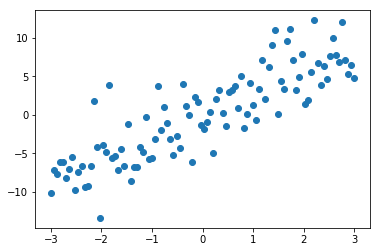

In [29]:
# quitar el valor medio de los datos
data[:,0] = (data[:,0]-np.mean(data[:,0]))
data[:,1] = (data[:,1]-np.mean(data[:,1]))
plt.scatter(data[:,0], data[:,1])

In [30]:
# Calcular la matriz de covarianza

CovMatrix = np.cov(data.T)
print(CovMatrix)

[[ 3.09152137  8.82101855]
 [ 8.82101855 34.56025706]]


In [33]:
# Creemos nuestra propia matriz de covarianza

def E(value):
    return sum(value)/(len(value)-1)

def GetCov(data_):
    
    num_var = len(data_[0]) # numero de variables
    CovM = np.ones((num_var, num_var))
    
    for i in range(num_var):
        for j in range(num_var):
            data1 = data_[:,i] # Tomando columna i
            data2 = data_[:,j] # tamando columna j
            
            mean1 = E(data1)
            mean2 = E(data2)
            
            CovM[i,j] = E( (data1-mean1)*(data2-mean2) )

    return CovM

In [34]:
CovMatrix1 = GetCov(data)
print(CovMatrix1)

[[ 3.09152137  8.82101855]
 [ 8.82101855 34.56025706]]


In [35]:
# Obtener los Auto-valores  y auto-Vectores
values, vectors = np.linalg.eig(CovMatrix)
print(values)
print(vectors)

[ 0.78757722 36.86420121]
[[-0.96754198 -0.25271035]
 [ 0.25271035 -0.96754198]]


In [36]:
print(vectors[0,0],vectors[0,1])
print(vectors[1,0],vectors[1,1])

(-0.9675419779586063, -0.2527103497839919)
(0.2527103497839919, -0.9675419779586063)


$$ m = tan\theta = v[1,0]/v[0,0] $$
$$ 1/m =cot\theta = v[1,1]/v[0,1] $$

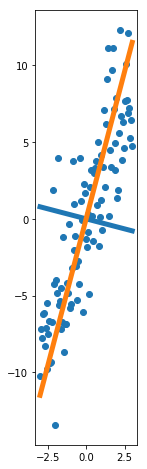

In [39]:
fig = plt.figure(figsize=(4,8))
ax = plt.axes()
plt.scatter(data[:,0], data[:,1])
x_line = np.linspace(-3.0,3.0)
plt.plot(x_line, x_line*vectors[1,0]/vectors[0,0], linewidth=5.0)
plt.plot(x_line, x_line*vectors[1,1]/vectors[0,1], linewidth=5.0)
ax.set_aspect(1.0)

In [44]:
new_data = np.dot(  vectors.T, data.T ) # la matriz de rotación es siempre la matriz transpuesta de los eigen-vectors

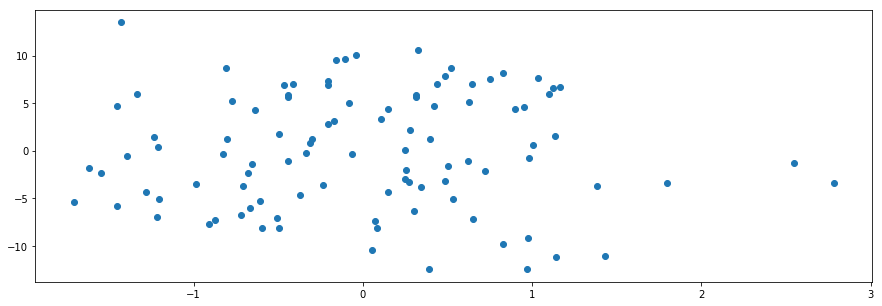

In [43]:
fig = plt.figure(figsize = (15,5))
ax = plt.axes()
plt.scatter(new_data[0,:], new_data[1,:])

# Usemos las herramientas de PCA para limpiar datos

(-2.7292712056271964,
 2.5702744393352615,
 -0.9326181575178751,
 1.004413830229183)

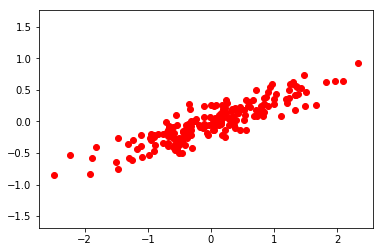

In [45]:
np.random.seed(1) # This is put in place in order to make the results reproducible
X = np.dot(np.random.random(size=(2, 2)), np.random.normal(size=(2, 200))).T
plt.plot(X[:, 0], X[:, 1], 'or')
plt.axis('equal')

In [46]:
pca = PCA(n_components = 2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [48]:
print(pca.explained_variance_)
print(pca.components_)

[0.7625315 0.0184779]
[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


[-2.47419458 -0.86089761]
[-0.1340136   0.38515116]


(-2.7292712056271964,
 2.5702744393352615,
 -0.9497608386363482,
 1.0052301483776818)

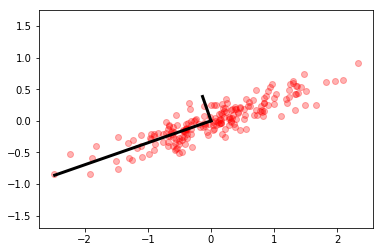

In [49]:
plt.plot(X[:, 0], X[:, 1], 'or', alpha=0.3)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    print(v)
    plt.plot([0, v[0]], [0, v[1]], '-k', lw=3)
plt.axis('equal')

Una de las dos direcciones es importante, la otra dirección puede ser ignorada. Veamos que sucede si mantenemos el 95% de la varianza

In [50]:
clf = PCA(0.95)
X_trans = clf.fit_transform(X)

In [52]:
print(X.shape)
print(X_trans.shape)

(200, 2)
(200, 1)


Los datos sufren una compresión 'Limpieza' del 50% manteniendo la información inicial

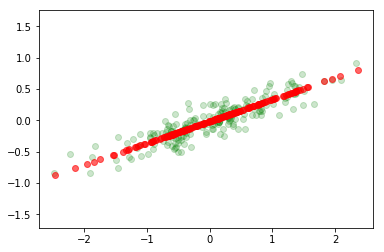

In [53]:
X_new = clf.inverse_transform(X_trans)
plt.plot(X[:, 0], X[:, 1], 'og', alpha=0.2)
plt.plot(X_new[:, 0], X_new[:, 1], 'or', alpha=0.6)
plt.axis('equal');

# Uso de PCA para reducir la dimensionalidad de los datos

In [54]:
cancer = load_breast_cancer()
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='|S23')

In [55]:
# Tenemos 30 features
print(cancer.feature_names.shape)

(30,)


In [56]:
# Definiendo PCA
pca = PCA(n_components = 2)
pca.fit(cancer.data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [57]:
# Generar una transformacion para reducirlo a dos dimensiones
datos_transformados = pca.transform(cancer.data)
print(cancer.data.shape, datos_transformados.shape)

((569, 30), (569, 2))


In [58]:
def Plot(vector):
    mglearn.discrete_scatter(vector[:,0],vector[:,1], cancer.target)
    plt.legend(cancer.target_names,loc='best')
    plt.xlabel('PCA1')
    plt.ylabel('PCA2')

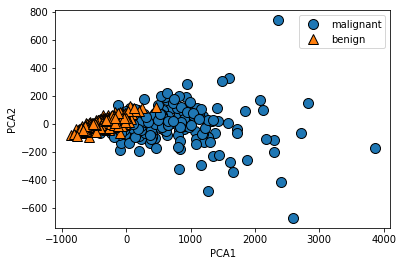

In [59]:
Plot(datos_transformados)

## Generando escalas similares para los datos

In [60]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
scale.fit(cancer.data) # escalar datos
datos_escalados=scale.transform(cancer.data) # escalar datos transformados
pca.fit(datos_escalados)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [61]:
datos_transformados = pca.transform(datos_escalados)

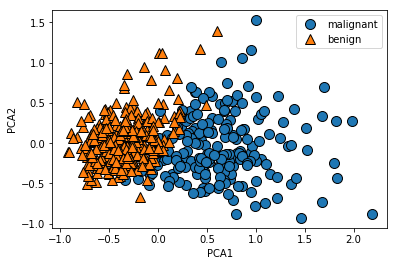

In [62]:
Plot(datos_transformados)

# Podemos ver mejor las diferencias